In [1]:
datos<-read.csv('kid_iq.csv')

In [2]:
summary(datos)

       X           kid_score         mom_hs           mom_iq      
 Min.   :  1.0   Min.   : 20.0   Min.   :0.0000   Min.   : 71.04  
 1st Qu.:109.2   1st Qu.: 74.0   1st Qu.:1.0000   1st Qu.: 88.66  
 Median :217.5   Median : 90.0   Median :1.0000   Median : 97.92  
 Mean   :217.5   Mean   : 86.8   Mean   :0.7857   Mean   :100.00  
 3rd Qu.:325.8   3rd Qu.:102.0   3rd Qu.:1.0000   3rd Qu.:110.27  
 Max.   :434.0   Max.   :144.0   Max.   :1.0000   Max.   :138.89  
    mom_work        mom_age     
 Min.   :1.000   Min.   :17.00  
 1st Qu.:2.000   1st Qu.:21.00  
 Median :3.000   Median :23.00  
 Mean   :2.896   Mean   :22.79  
 3rd Qu.:4.000   3rd Qu.:25.00  
 Max.   :4.000   Max.   :29.00  

In [3]:
class(datos)

[1] "data.frame"

In [4]:
dim(datos)

[1] 434   6

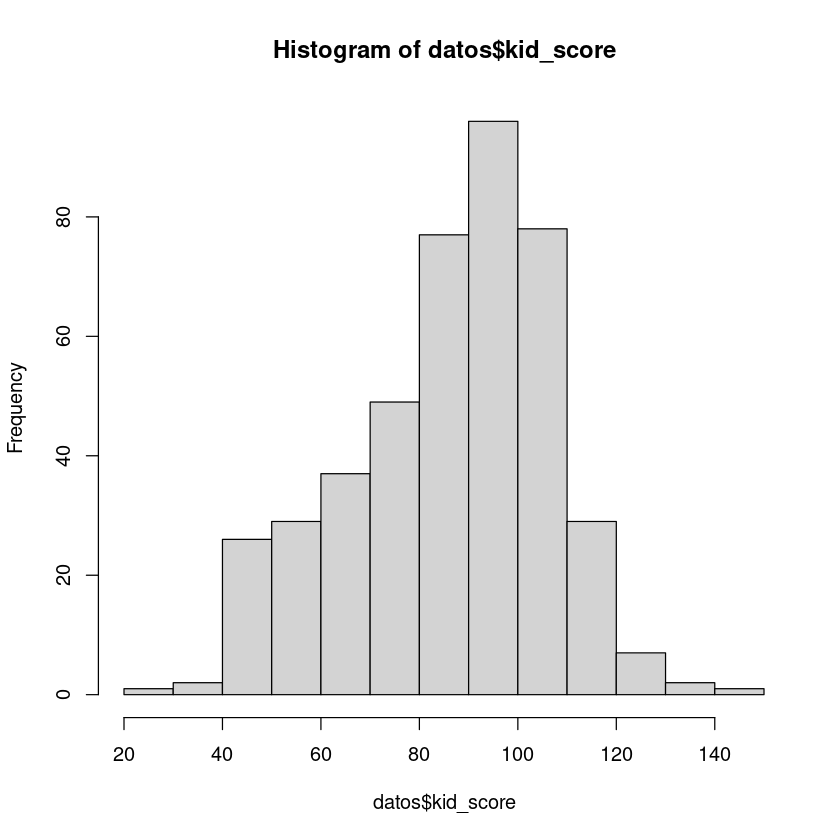

In [5]:
hist(datos$kid_score)

In [5]:
hist(datos$kid_score, plot=F)->histograma

In [47]:
ls()

[1] "caso1"      "caso2"      "d"          "datos"      "histograma"
 [6] "p"          "q"          "qo"         "s"          "tf"        
[11] "u"

In [6]:
str(histograma)

List of 6
 $ breaks  : int [1:14] 20 30 40 50 60 70 80 90 100 110 ...
 $ counts  : int [1:13] 1 2 26 29 37 49 77 96 78 29 ...
 $ density : num [1:13] 0.00023 0.000461 0.005991 0.006682 0.008525 ...
 $ mids    : num [1:13] 25 35 45 55 65 75 85 95 105 115 ...
 $ xname   : chr "datos$kid_score"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


In [7]:
histograma$mids

[1]  25  35  45  55  65  75  85  95 105 115 125 135 145

In [8]:
histograma$counts

[1]  1  2 26 29 37 49 77 96 78 29  7  2  1

Dada una muestra de tamaño $n$ de una variable $x$ para cada valor de la variable $x_i$ observado en la muestra se define:

- Frecuencia absoluta $n_i$: numero de veces que $x_i$ aparece en la muestra
- Frecuencia relativa $f_i$: proporcion de veces que $x_i$ aparece en la muestra $$f_i=\frac{n_i}{n}$$
- Frecuencia absoluta acumulada $N_i$: numero de valores en la muestra menores o iguales a $X_i$ $$N_i=n_1+...+n_n = N_{i-1}+n_i$$
- Frecuencia relativa acumulada $F_i$: proporcion de valores en la muestra menores o iguales $x_i$ $$F_i=\frac{N_i}{n}$$

In [16]:
tf <- data.frame(m_clase = histograma$mids, f_absoluta = histograma$counts)

In [10]:
tf

m_clase,f_absoluta
<dbl>,<int>
25,1
35,2
45,26
55,29
65,37
75,49
85,77
95,96
105,78


In [18]:
sum(tf$f_absoluta)

[1] 434

In [19]:
tf$f_rel <- tf$f_absoluta/sum(tf$f_absoluta)

In [20]:
tf$f_rel <- round(tf$f_rel, 4)

In [21]:
tf$f_acum <- cumsum(tf$f_rel)

In [22]:
# muestra ponderada
tf$m_p <- tf$m_clase * tf$f_rel

In [23]:
tf

m_clase,f_absoluta,f_rel,f_acum,m_p
<dbl>,<int>,<dbl>,<dbl>,<dbl>
25,1,0.0023,0.0023,0.0575
35,2,0.0046,0.0069,0.1610
45,26,0.0599,0.0668,2.6955
55,29,0.0668,0.1336,3.6740
65,37,0.0853,0.2189,5.5445
75,49,0.1129,0.3318,8.4675
85,77,0.1774,0.5092,15.0790
95,96,0.2212,0.7304,21.0140
105,78,0.1797,0.9101,18.8685


In [24]:
sum(tf$m_p)

[1] 86.2105

In [25]:
mean(datos$kid_score)

[1] 86.79724

## Espacio muestreal
Todos los valores posibles de nuestra variable

prob empirica por que nos basamos en la muestra

In [26]:
# Caso 1 - mamas que si fueron a highschool = 1
caso1 <- datos$kid_score[datos$mom_hs == 1]
# Caso 2 - mamas que no fueron a highschool = 0
caso2 <- datos$kid_score[datos$mom_hs == 0]

In [27]:
length(caso1)

[1] 341

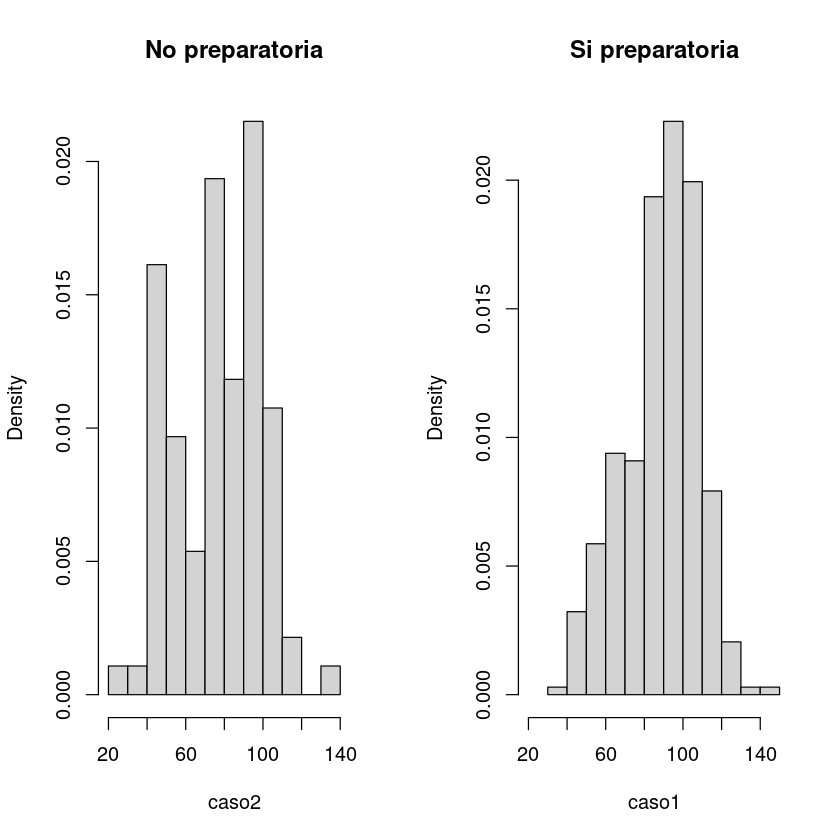

In [28]:
par(mfrow = c(1, 2))
hist(caso2, main = "No preparatoria", nclass = 10, xlim = c(20, 150), freq = F)
hist(caso1, main = "Si preparatoria", nclass = 10, xlim = c(20, 150), freq = F)

In [29]:
quantile(datos$kid_score, probs=c(0.25, 0.5, 0.75))

25% 50% 75% 
 74  90 102

In [30]:
quantile(datos$kid_score, probs=c(0.1))

10% 
56.3

In [31]:
seq(0,1,0.05)->q

In [32]:
quantile(datos$kid_score, q)->qo

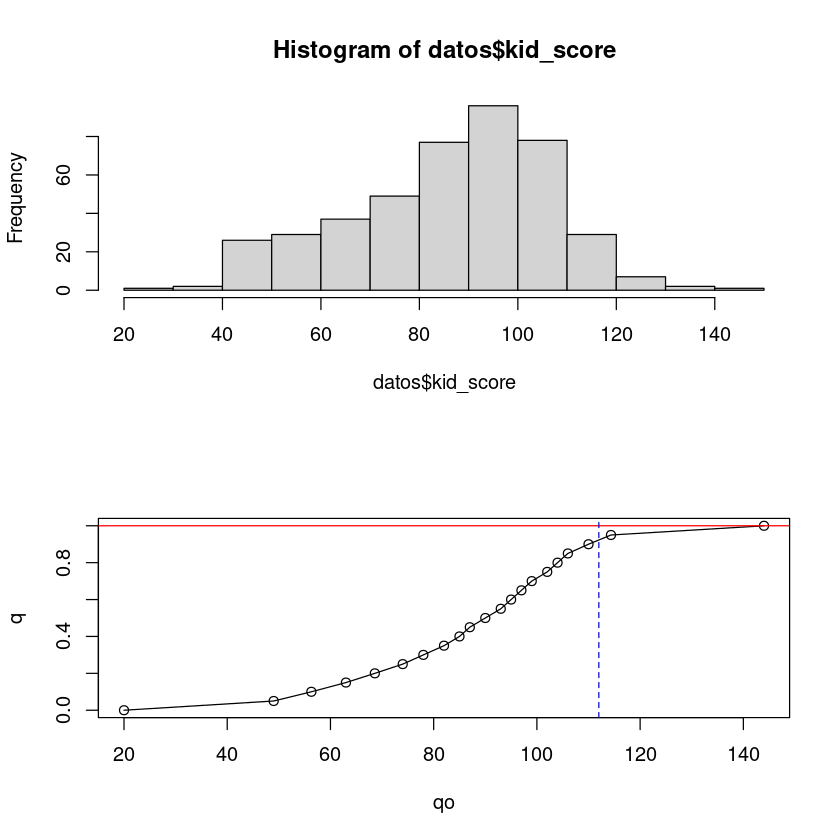

In [33]:
par(mfrow = c(2,1))
hist(datos$kid_score, xlim = c(20,150))
plot(qo,q,t="o")
abline(h=1,col="red")
abline(v = 112, col = "blue", lty=2)

In [34]:
u <- mean(datos$kid_score)
s <- sd(datos$kid_score)
q <- 0:180
d <- dnorm(q, mean = u, sd = s)

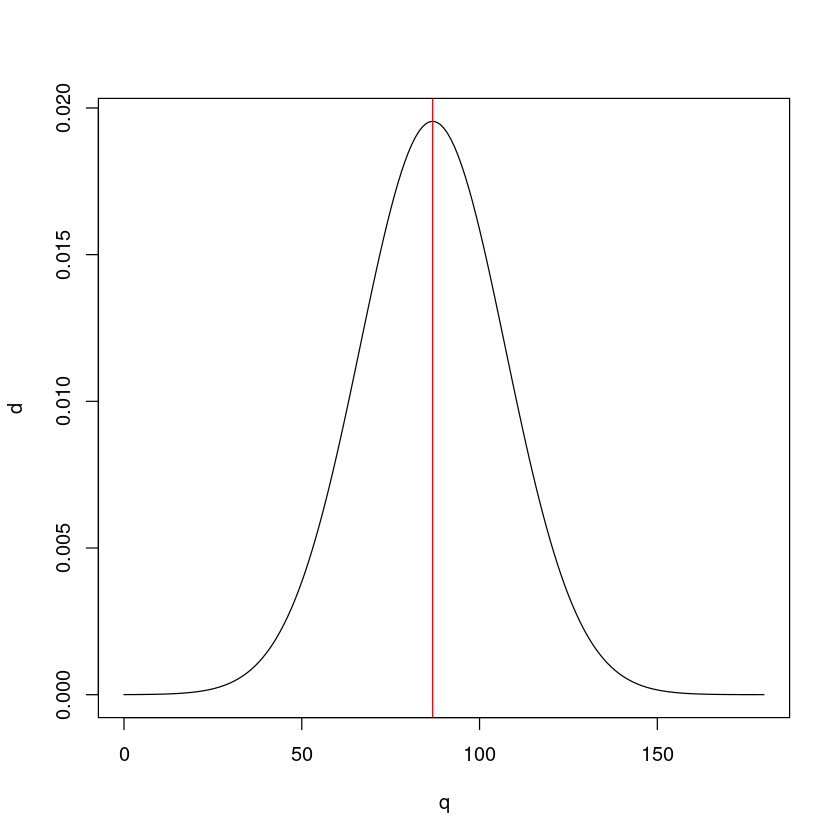

In [35]:
plot(q, d, t = "l")
abline(v = u, col = "red")

In [36]:
# ninos con menos de 50 = 3.57%
pnorm(q = 50, u, s)

[1] 0.03570656

In [37]:
p <- pnorm(q, u, s)

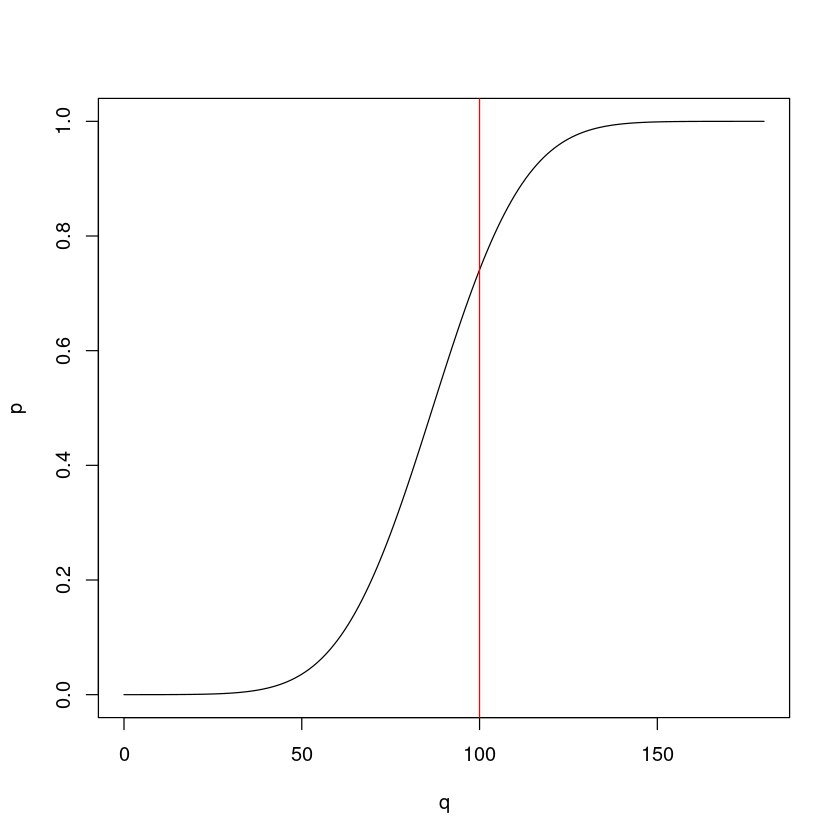

In [38]:
plot(q, p, t = "l")
abline(v = 100, col = "red")

In [39]:
# P(x) Entre 80 y 90
pnorm(90, u, s) - pnorm(80, u, s)

[1] 0.1927862

In [40]:
# P(x)<80 | P(x)>145
pnorm(80, u, s) + (1 - pnorm(145, u, s))

[1] 0.3717335

In [41]:
pnorm(145, u, s, lower.tail = F)

[1] 0.002175109

In [42]:
# cuartiles 1, 3
qnorm(c(0.25, 0.75), u, s)

[1]  73.03043 100.56404

In [43]:
# intervalo de confianza del 95% para kid_score
qnorm(c(0.025, 0.975), u, s)

[1]  46.79302 126.80145

In [44]:
# intervalo de confianza del 99% para kid_score
qnorm(c(0.005, 0.995), u, s)

[1]  34.22279 139.37168

_______________

In [2]:
datos <- read.csv("kid_iq.csv")

H0: Salario promedio u = 200k pesos (teórica)\
Ha: Salario promedio u!= 200k pesos

asumimos una distribucion normal \
alpha = 0.05 nivel maximo de tolerancia \
confiabilidad = 1 - alpha = 0.95

Tomaremos una muestra para estimar la media (medida) y la varianza

In [3]:
muestra <- c(225, 210, 300, 150, 180, 280, 275, 235, 200, 275, 240, 310) * 1000

In [7]:
u <- mean(muestra)

In [8]:
s <- sd(muestra)

In [14]:
x <- seq(70000, 350000, 1000)

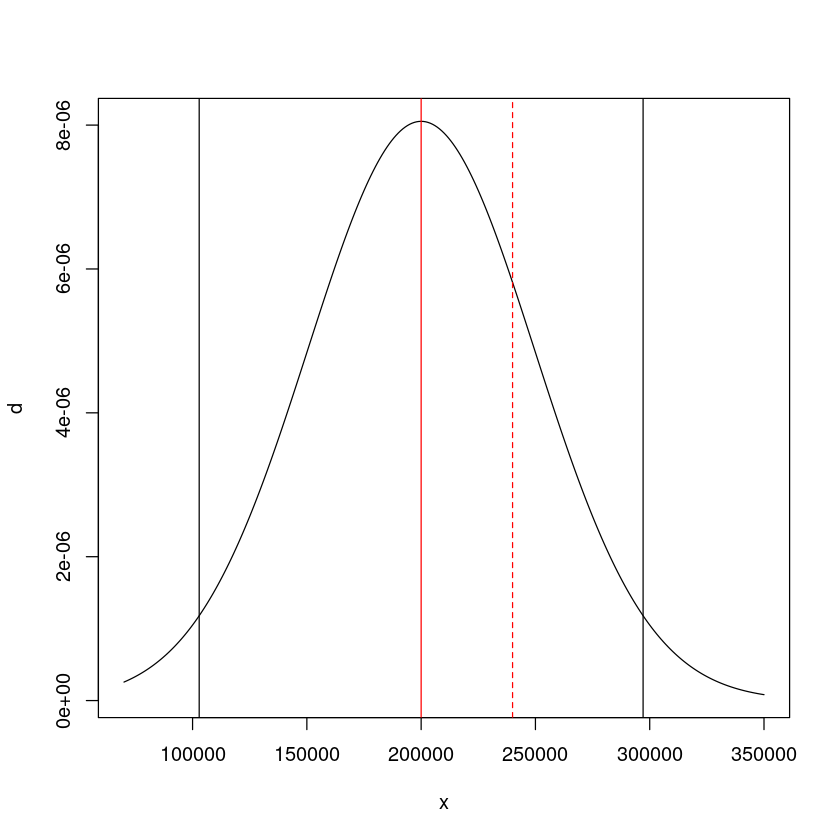

In [19]:
d <- dnorm(x, 200000, s)
plot(x, d, t = "l")
abline(v = 200000, col="red")
abline(v = u, col="red", lty = 2)

l1 <- qnorm(0.025, 200000, s)
l2 <- qnorm(0.975, 200000, s)

abline(v = c(l1, l2))

No se rechaza la hipotesis nula

_________

H0: Salario promedio u = 320k pesos (teórica)\
Ha: Salario promedio u!= 320k pesos

asumimos una distribucion normal \
alpha = 0.05 nivel maximo de tolerancia \
confiabilidad = 1 - alpha = 0.95

Tomaremos una muestra para estimar la media (medida) y la varianza

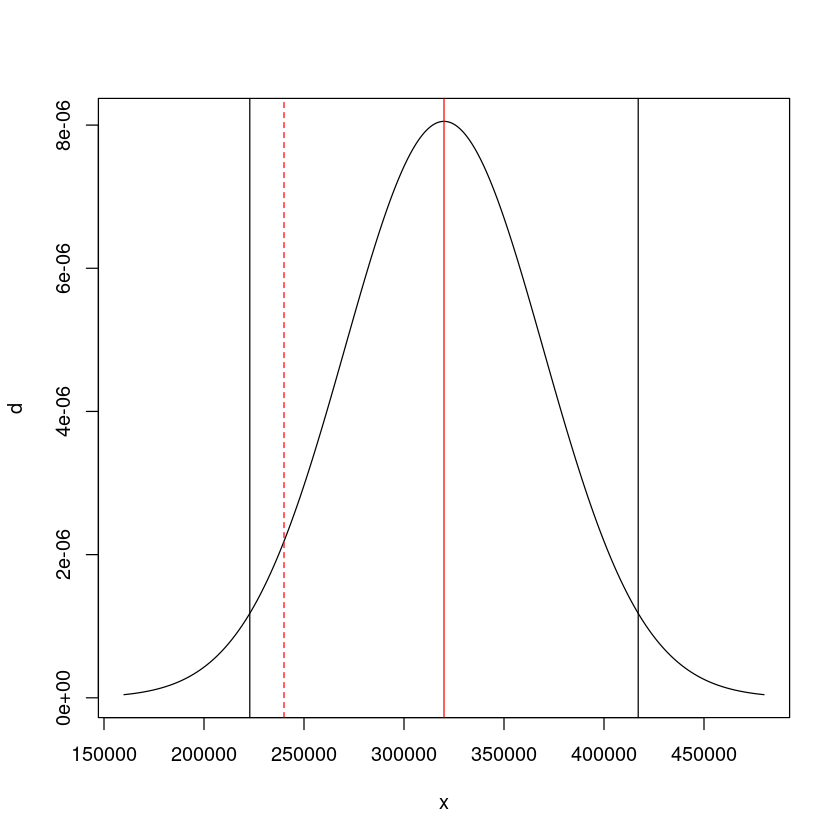

In [20]:
x <- seq(160000, 480000, 1000)

d <- dnorm(x, 320000, s)
plot(x, d, t = "l")
abline(v = 320000, col="red")
abline(v = u, col="red", lty = 2)

l1 <- qnorm(0.025, 320000, s)
l2 <- qnorm(0.975, 320000, s)

abline(v = c(l1, l2))

NO se rechaza la hipotesis nula

In [21]:
l1
l2

[1] 222896.8

[1] 417103.2

______
# 21/08/2024

Un fabricante de detectores de monoxido de carbono declara que sus aparatos se activan cuando las concentraciones superan las 10 ppm

Fabricante (me interesa probar que estoy bien - usando la alternativa) \
H0: u >  10 \
Ha: u <= 10

Autoridad (me interesa probar que el fabricante esta mal - usando la alternativa)\
H0: u <= 10\
Ha: u >  10

$\alpha$ = 0.05

In [1]:
a <- c(10.25, 10.37, 10.66, 10.47, 10.56, 10.22, 10.44, 10.38, 10.63, 10.4, 10.39, 10.26, 10.32, 10.35, 10.54, 10.33, 10.48, 10.68)

In [2]:
x <- seq(-3, 3, 0.1)
d <- dnorm(x)

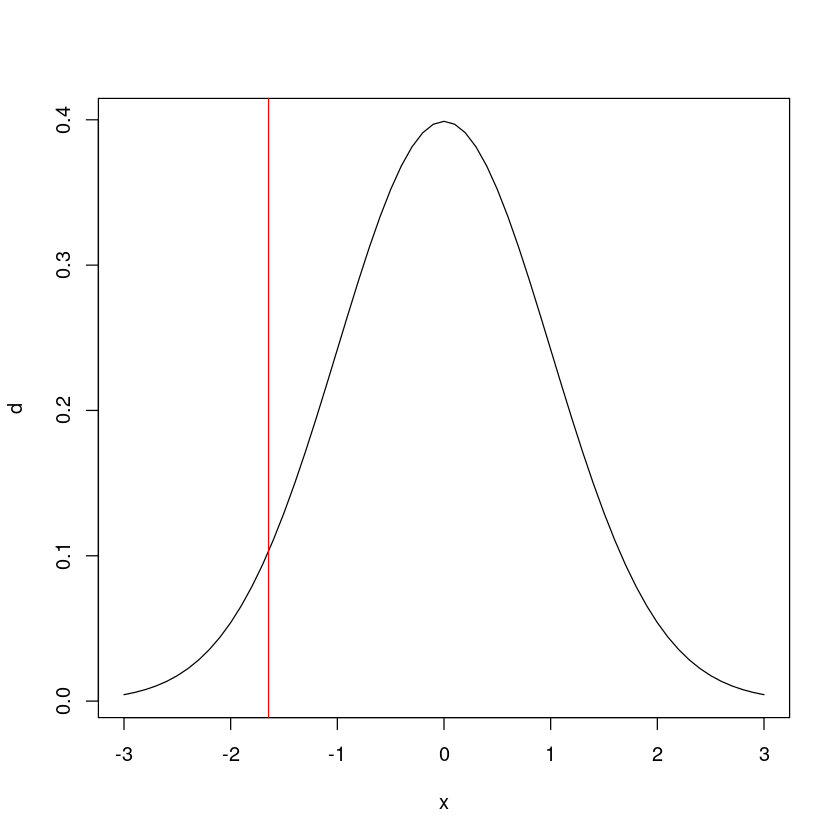

In [5]:
plot(x,d,type = "l")
abline(v = qnorm(0.05), col="red")

In [6]:
x_bar <- mean(a)
s_x = sd(a) / sqrt(length(a))
z <- (x_bar - 10) / s_x

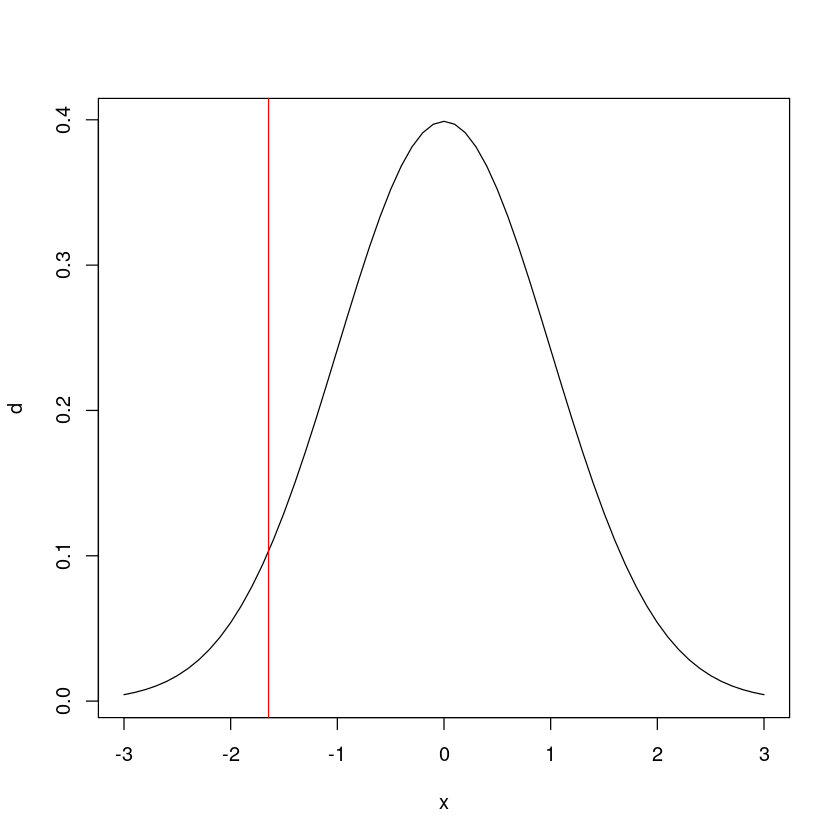

In [7]:
plot(x,d,type = "l")
abline(v = qnorm(0.05), col="red")
abline(v = z, lty = 2, col = "blue")

Las concentraciones de As en el agua para consumo estan por debajo de 12 ppm

H0: As <= 12 \
Ha: As >  12

$\alpha$ = 0.05

In [8]:
# Muestra
b <- c(10, 14, 12, 11, 12, 14, 15, 10, 9, 16, 15, 14)

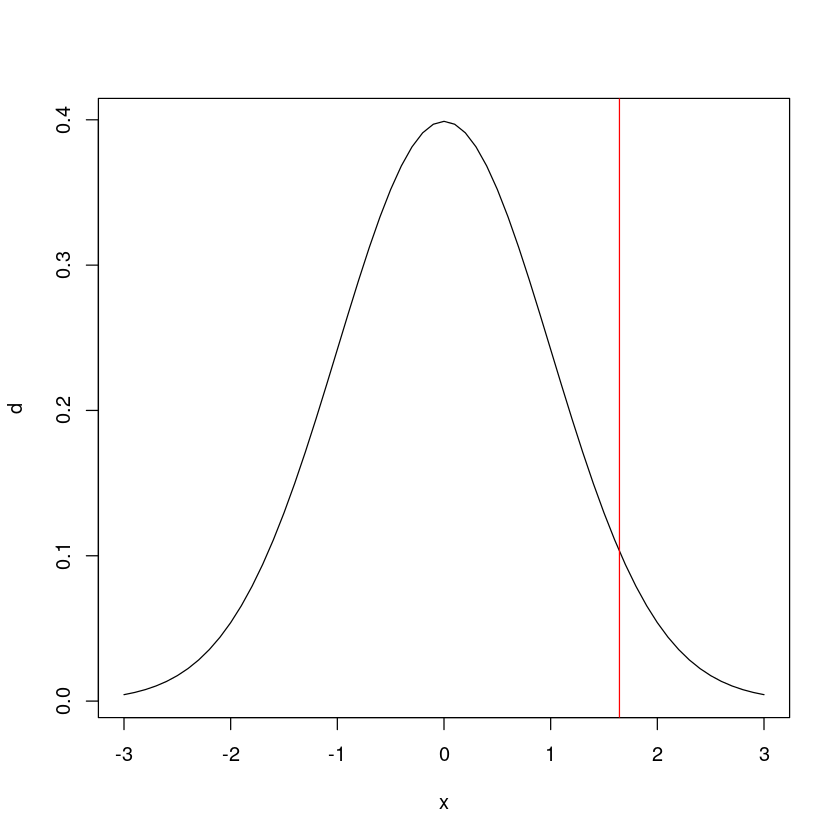

In [10]:
x <- seq(-3, 3, 0.1)
d <- dnorm(x)
plot(x,d,type = "l")
abline(v = qnorm(0.95), col="red")

In [13]:
x_bar <- mean(b)
s_x = sd(b) / sqrt(length(b))
z <- (x_bar - 12) / s_x

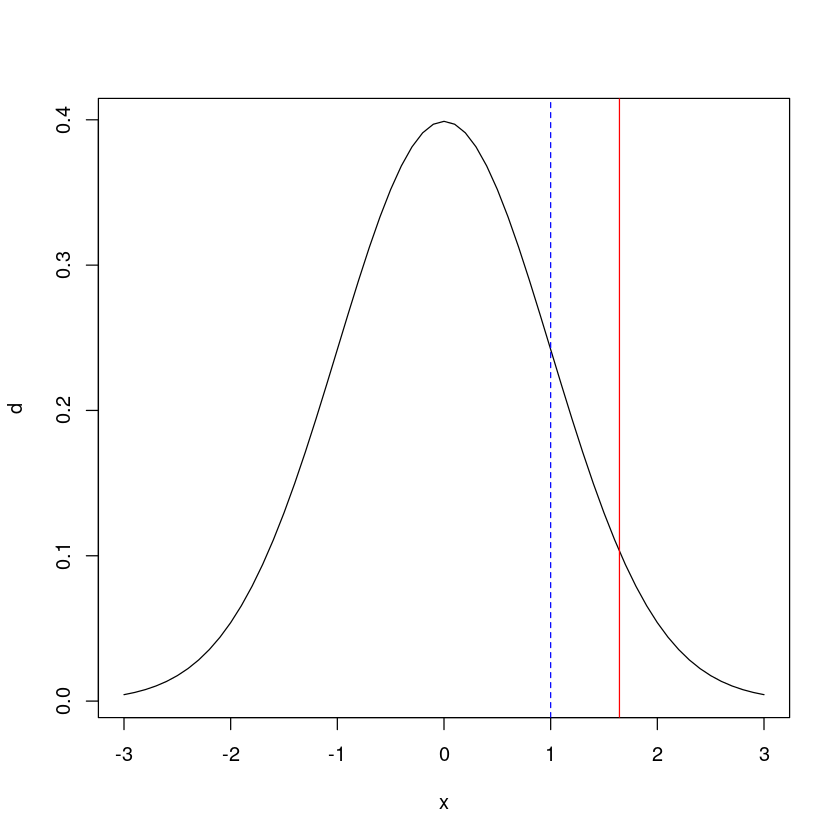

In [15]:
plot(x,d,type = "l")
abline(v = qnorm(0.95), col="red")
abline(v = z, lty = 2, col = "blue")

Area de NO rechazo \
NO hay evidencia suficiente para decir que las concentraciones de arsenico de ese agua sean mayores a 12

In [17]:
pnorm(z, lower.tail = F)

[1] 0.1586553

_____
Distribucion T

In [3]:
datos <- read.csv("kid_iq.csv")

In [5]:
head(datos)

,X,kid_score,mom_hs,mom_iq,mom_work,mom_age
,<int>,<int>,<int>,<dbl>,<int>,<int>
1,1,65,1,121.11753,4,27
2,2,98,1,89.36188,4,25
3,3,85,1,115.44316,4,27
4,4,83,1,99.44964,3,25
5,5,115,1,92.74571,4,27
6,6,98,0,107.90184,1,18


Los niños cuyas madres asistieron al HS obtienen promedio de 110 unidades en la prueba

H0: u = 110\
Ha: u ≠ 110

α = 0.05

In [6]:
muestra <- datos$kid_score[datos$mom_hs == 1]

In [8]:
# Grados de libertad = n (tamano de la muestra)
length(muestra)

[1] 341

In [19]:
qt(c(0.025, 0.975), 340) # se aproxima a la distrubucion normal

[1] -1.966966  1.966966

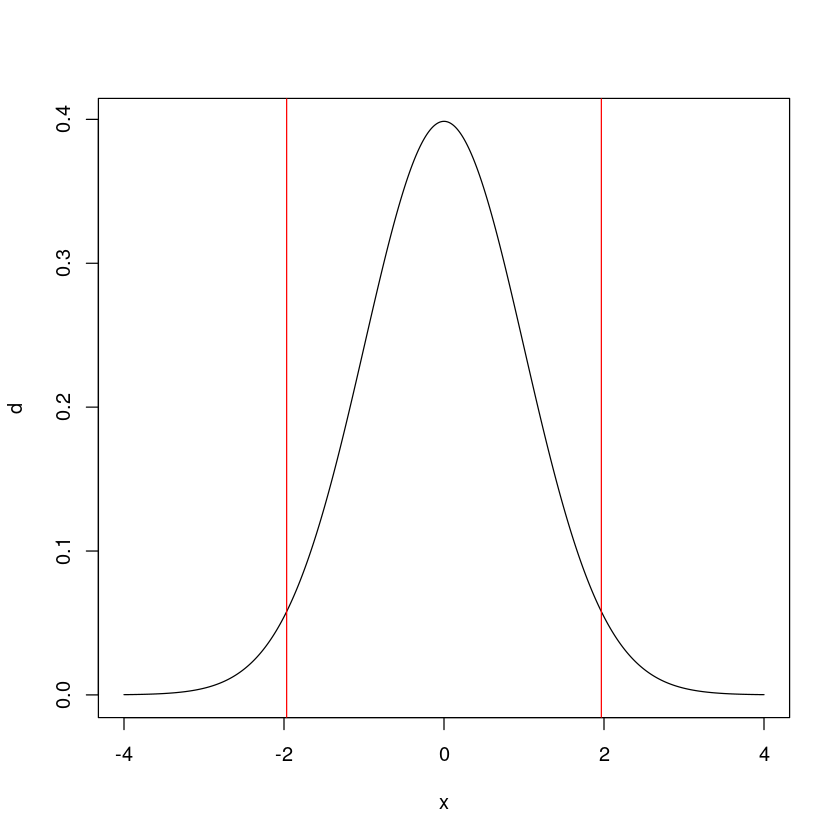

In [11]:
x <- seq(-4, 4, 0.01)
d <- dt(x, df = length(muestra) - 1)

plot(x, d, t = "l")

# t0.05(2)340
abline(v = qt(c(0.025, 0.975), 340), col = "red")

$$t=\frac{x-\mu}{s_x}$$

In [12]:
tc <- (mean(muestra)-110) / (sd(muestra)/sqrt(length(muestra)))

In [13]:
tc

[1] -20.04712

Zona de RECHAZO

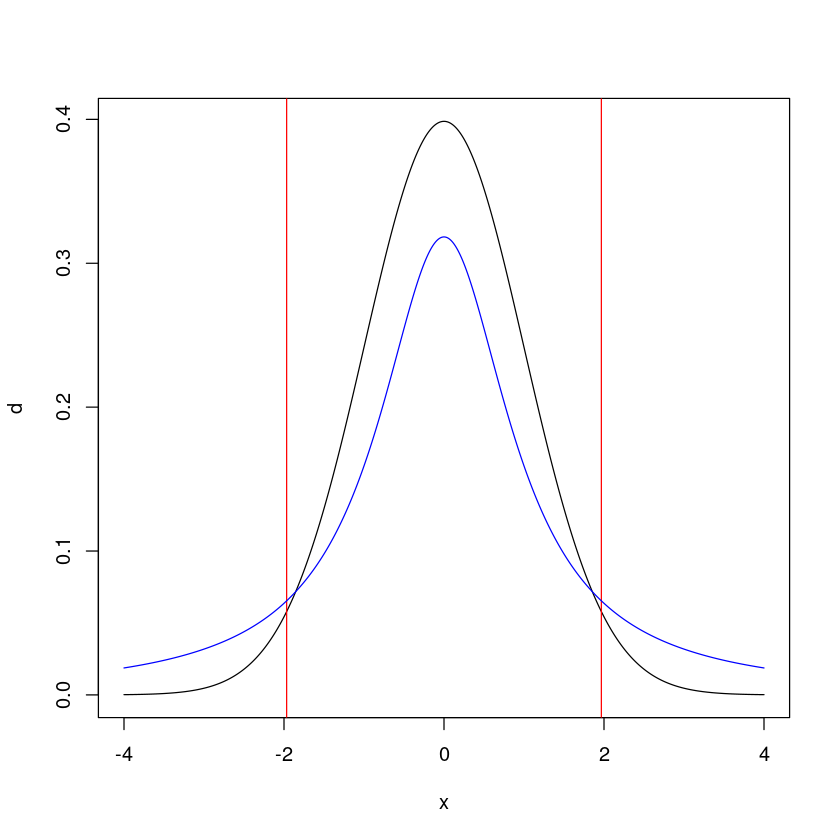

In [17]:
d1 <- dt(x, df=1)
x <- seq(-4, 4, 0.01)
d <- dt(x, df = length(muestra) - 1)

plot(x, d, t = "l")
abline(v = qt(c(0.025, 0.975), 340), col = "red")
lines(x, d1, col = "blue")

abline(v = qt(c(0.025, 0.975), 1), col = "blue", lty = 2)

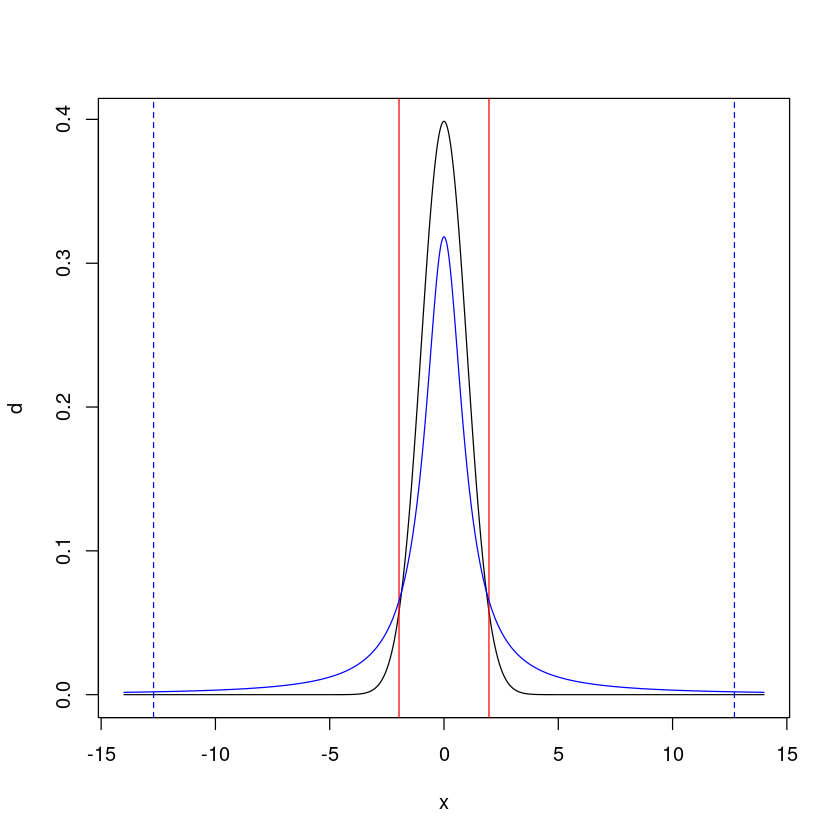

In [18]:
x <- seq(-14, 14, 0.01)
d <- dt(x, df = length(muestra) - 1)
d1 <- dt(x, df=1)
plot(x, d, t = "l")
abline(v = qt(c(0.025, 0.975), 340), col = "red")
lines(x, d1, col = "blue")

abline(v = qt(c(0.025, 0.975), 1), col = "blue", lty = 2)

In [22]:
x <- c(0.1013,0.1018,0.102,0.1021,0.1028,0.1014,0.1022,0.1022,0.1023,0.1024)

In [21]:
x <- c(0.9938, 0.9936, 0.9924, 0.9882, 0.9931, 0.9904, 0.9913, 0.9923, 0.9910, 0.9910)

In [23]:
round(x = mean(x), 4)

[1] 0.1021

In [24]:
e_abs <- round(abs(c(x-0.1)), 4)
e_abs

[1] 0.0013 0.0018 0.0020 0.0021 0.0028 0.0014 0.0022 0.0022 0.0023 0.0024

In [25]:
e_rel <- (e_abs/0.1)*100
e_rel

[1] 1.3 1.8 2.0 2.1 2.8 1.4 2.2 2.2 2.3 2.4

In [26]:
round(sd(x),4)

[1] 5e-04

In [27]:
round(mean(e_abs), 4)
mean(e_rel)

[1] 0.0021

[1] 2.05